In [ ]:
import pandas as pd

df = pd.read_csv("../data/raw/retail_profit_margin_dataset_30k.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          30000 non-null  object 
 1   product_name        30000 non-null  object 
 2   category            30000 non-null  object 
 3   brand               30000 non-null  object 
 4   store_id            30000 non-null  object 
 5   store_name          30000 non-null  object 
 6   store_location      30000 non-null  object 
 7   base_price          30000 non-null  float64
 8   discount_rate       30000 non-null  float64
 9   promotion_type      30000 non-null  object 
 10  day_of_year         30000 non-null  int64  
 11  month               30000 non-null  int64  
 12  day_of_week         30000 non-null  object 
 13  season              30000 non-null  object 
 14  is_holiday          30000 non-null  int64  
 15  avg_units_sold_30d  30000 non-null  int64  
 16  avg_

In [3]:
df["product_id"].nunique()


1200

In [4]:
df["promotion_type"].unique()


array(['No Promotion', 'Flash Sale', 'Clearance', 'Holiday', 'Seasonal'],
      dtype=object)

In [5]:
df["promotion_type"] = df["promotion_type"].fillna("No_Promotion")


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X = df.drop(columns=["profit_margin", "profit_class"])
y = df["profit_margin"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

In [7]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
base_price,30000.0,266.459285,323.513098,2.11,50.95,164.80,310.87,1492.4
discount_rate,30000.0,0.157679,0.169108,0.00,0.00,0.12,0.28,0.6
day_of_year,30000.0,182.621133,105.797750,1.00,90.00,182.00,275.00,365.0
month,30000.0,6.575733,3.528987,1.00,3.00,7.00,10.00,13.0
is_holiday,30000.0,0.154100,0.361051,0.00,0.00,0.00,0.00,1.0
avg_units_sold_30d,30000.0,23.459633,15.752887,1.00,13.00,19.00,29.00,219.0
avg_customers_30d,30000.0,42.901800,31.012586,1.00,22.00,35.00,54.00,464.0


In [8]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_counts = ((df[num_cols] < (Q1 - 1.5 * IQR)) | 
                  (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

outlier_counts


base_price            3028
discount_rate            0
day_of_year              0
month                    0
is_holiday            4623
avg_units_sold_30d    1478
avg_customers_30d     1421
dtype: int64

In [9]:
import numpy as np

df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)


In [10]:
df[["month", "month_sin", "month_cos"]].head()

,month,month_sin,month_cos
0,6,1.224647e-16,-1.000000
1,12,-2.449294e-16,1.000000
2,7,-5.000000e-01,-0.866025
3,10,-8.660254e-01,0.500000
4,12,-2.449294e-16,1.000000


In [12]:
cat_cols

Index(['product_id', 'product_name', 'category', 'brand', 'store_id',
       'store_name', 'store_location', 'promotion_type', 'day_of_week',
       'season'],
      dtype='object')

In [13]:
df["promotion_type"].value_counts(normalize=True)


promotion_type
No Promotion    0.399967
Seasonal        0.199500
Flash Sale      0.153433
Clearance       0.148400
Holiday         0.098700
Name: proportion, dtype: float64

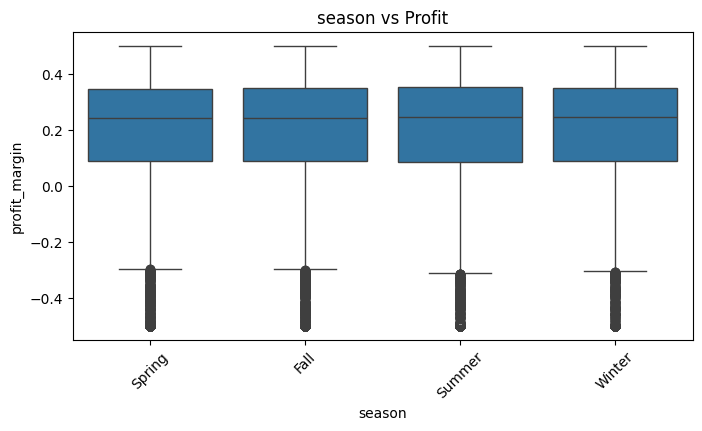

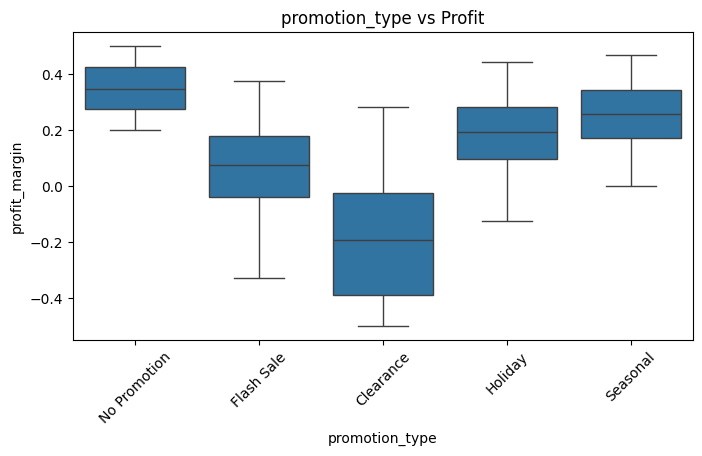

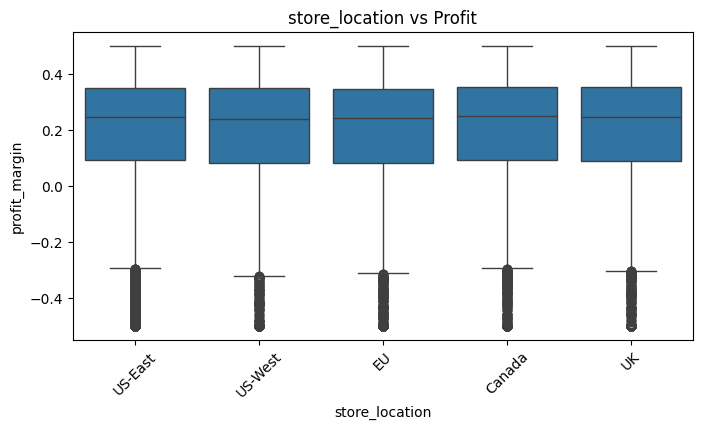

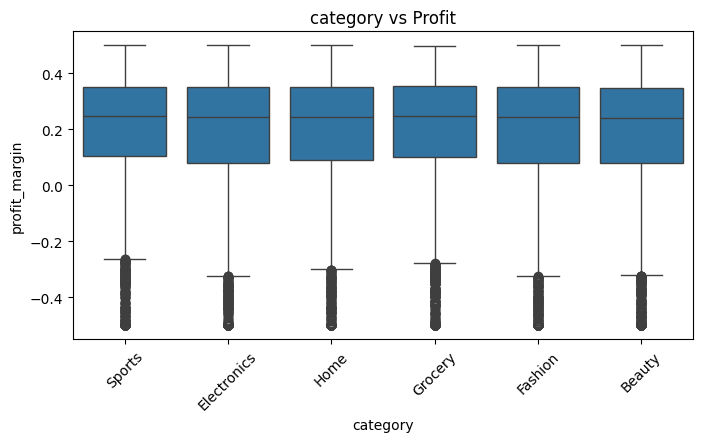

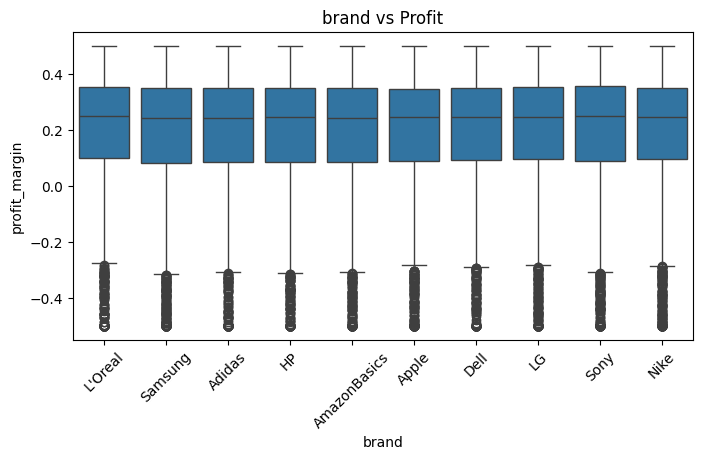

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns
cat_cols = ["season", "promotion_type", "store_location", "category", "brand"]
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col], y=df["profit_margin"])
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Profit")
    plt.show()


In [17]:
df["store_location"].value_counts(normalize=True)

store_location
US-East    0.336567
EU         0.201533
Canada     0.160267
UK         0.159467
US-West    0.142167
Name: proportion, dtype: float64

In [18]:
df["season"].value_counts(normalize=True)


season
Fall      0.280167
Spring    0.249633
Summer    0.249600
Winter    0.220600
Name: proportion, dtype: float64

In [19]:
df["day_of_week"].value_counts(normalize=True)


day_of_week
Sat    0.145133
Sun    0.144700
Tue    0.144433
Thu    0.143067
Wed    0.141500
Fri    0.141167
Mon    0.140000
Name: proportion, dtype: float64

In [20]:
df["category"].value_counts(normalize=True)


category
Electronics    0.176133
Sports         0.173267
Beauty         0.170833
Grocery        0.166733
Home           0.156767
Fashion        0.156267
Name: proportion, dtype: float64

In [21]:
df["brand"].value_counts(normalize=True)


brand
Samsung         0.117867
HP              0.103767
Adidas          0.102667
L'Oreal         0.101567
Nike            0.097800
AmazonBasics    0.096900
Apple           0.096700
Sony            0.096700
LG              0.096333
Dell            0.089700
Name: proportion, dtype: float64

In [30]:
# High-cardinality categorical features (embedding / hashing later)
high_card_cat = [
    "product_id",
    "store_id"
]

# Low-cardinality categorical features (one-hot encoding)
low_card_cat = [
    "season",
    "day_of_week",
    "promotion_type",
    "store_location",
    "category",
    "brand"
]

# Numerical features
num_features = [
    "base_price",
    "discount_rate",
    "avg_units_sold_30d",
    "avg_customers_30d",
    
    
    
    "is_holiday"
]

# Columns to drop
drop_cols = [
    "product_name",
    
    "store_name"
]

print("High-cardinality:", high_card_cat)
print("Low-cardinality:", low_card_cat)


High-cardinality: ['product_id', 'store_id']
Low-cardinality: ['season', 'day_of_week', 'promotion_type', 'store_location', 'category', 'brand']


In [28]:
X = df.drop(columns=["profit_margin", "profit_class"])
y = df["profit_margin"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction import FeatureHasher
import numpy as np

# ======== 1. One-Hot Encoding for low-cardinality categorical features ========
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[("low_card_ohe", ohe, low_card_cat)],
    remainder="passthrough"  # keeps numerical features
)

# Fit only on X_train, transform both train and test
X_train_ohe = preprocessor.fit_transform(X_train.drop(columns=drop_cols))
X_test_ohe = preprocessor.transform(X_test.drop(columns=drop_cols))

# Get OHE feature names from fitted preprocessor
ohe_feature_names = preprocessor.named_transformers_['low_card_ohe'].get_feature_names_out()

# Keep only OHE part (optional)
X_train_ohe_only = X_train_ohe[:, :len(ohe_feature_names)]
X_test_ohe_only = X_test_ohe[:, :len(ohe_feature_names)]

# ======== 2. Feature Hashing for high-cardinality features ========
hasher = FeatureHasher(n_features=16, input_type="string")

hashed_train = hasher.transform(X_train[high_card_cat].astype(str).values).toarray()
hashed_test = hasher.transform(X_test[high_card_cat].astype(str).values).toarray()

# ======== 3. Numerical features ========
X_train_num = X_train[num_features].values
X_test_num = X_test[num_features].values

# ======== 4. Combine all features ========
X_train_final = np.hstack([hashed_train, X_train_ohe_only, X_train_num])
X_test_final = np.hstack([hashed_test, X_test_ohe_only, X_test_num])

print("Final train shape:", X_train_final.shape)
print("Final test shape:", X_test_final.shape)


Final train shape: (24000, 58)
Final test shape: (6000, 58)


Columns: 60 → combined features:

Hashed high-cardinality (product_id, store_id) → 16

One-hot low-cardinality → ~37 

Numerical features → 7

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mlflow
import mlflow.sklearn

# ======== 1. Start MLflow run ========
mlflow.set_experiment("Profit_margin_Prediction_Experiment")
with mlflow.start_run(run_name="LinearRegression_Baseline"):

    # ======== 2. Train Linear Regression ========
    lr = LinearRegression()
    lr.fit(X_train_final, y_train)

    # ======== 3. Predict on test set ========
    y_pred = lr.predict(X_test_final)

    # ======== 4. Evaluate ========
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    print(f"RMSE: {rmse:.2f}, R2: {r2:.4f}")

    # ======== 5. Log to MLflow ========
    mlflow.log_param("model_type", "LinearRegression")
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)

        # Log dataset info
    mlflow.log_param("num_rows", df.shape[0])
    mlflow.log_param("num_columns", df.shape[1])
    mlflow.log_param("categorical_columns", list(cat_cols))
    mlflow.log_param("numerical_columns", list(num_cols))

    # Optionally, save the dataset and log as artifact
    df.to_csv("../data/processed/profit_dataset_processed.csv", index=False)
    mlflow.log_artifact("../data/processed/profit_dataset_processed.csv")

    mlflow.set_tag("description", "Baseline linear regression model predicting profit using hashed + one-hot + numerical features")


    mlflow.sklearn.log_model(lr, "linear_regression_model")


RMSE: 0.11, R2: 0.7760


2025/12/31 20:12:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
